<a href="https://colab.research.google.com/github/Harishkent/Advanced-Machine-learning-64060/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

train_data[0]

train_labels[0]

max([max(sequence) for sequence in train_data])

9999

In [39]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [40]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [41]:
from tensorflow import keras


from tensorflow.keras.layers  import Dropout

from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
Dropout(0.5),
    layers.Dense(32, activation="tanh"),
  Dropout(0.5),
     layers.Dense(32, activation="tanh"),
    

    
    layers.Dense(1, activation="sigmoid")
])

In [42]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [43]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [44]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=6,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/6
30/30 [==============================] - 5s 107ms/step - loss: 0.1752 - accuracy: 0.7405 - val_loss: 0.1001 - val_accuracy: 0.8675
Epoch 2/6
30/30 [==============================] - 5s 158ms/step - loss: 0.1000 - accuracy: 0.8690 - val_loss: 0.0849 - val_accuracy: 0.8827
Epoch 3/6
30/30 [==============================] - 2s 81ms/step - loss: 0.0775 - accuracy: 0.9004 - val_loss: 0.0862 - val_accuracy: 0.8830
Epoch 4/6
30/30 [==============================] - 2s 72ms/step - loss: 0.0662 - accuracy: 0.9132 - val_loss: 0.0896 - val_accuracy: 0.8793
Epoch 5/6
30/30 [==============================] - 2s 73ms/step - loss: 0.0593 - accuracy: 0.9239 - val_loss: 0.0981 - val_accuracy: 0.8725
Epoch 6/6
30/30 [==============================] - 2s 77ms/step - loss: 0.0541 - accuracy: 0.9295 - val_loss: 0.1008 - val_accuracy: 0.8705


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [45]:
best_score = max(history.history['val_accuracy'])
best_score

0.8830000162124634

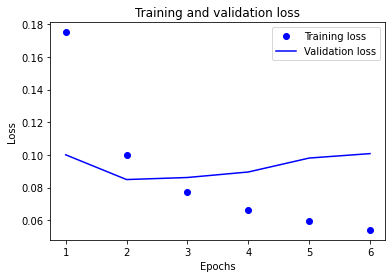

In [46]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

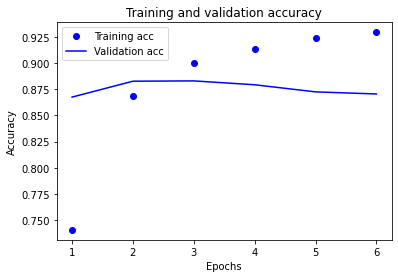

In [47]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [48]:
model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
   layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 4s 55ms/step - loss: 0.4260 - accuracy: 0.8034
Epoch 2/4
49/49 [==============================] - 3s 55ms/step - loss: 0.2507 - accuracy: 0.9001
Epoch 3/4
49/49 [==============================] - 4s 77ms/step - loss: 0.2008 - accuracy: 0.9217
Epoch 4/4
782/782 [==============================] - 4s 5ms/step - loss: 0.3414 - accuracy: 0.8651


[0.34136953949928284, 0.8650799989700317]

In [49]:
results

[0.34136953949928284, 0.8650799989700317]

In [50]:
model.predict(x_test)


782/782 [==============================] - 3s 4ms/step


array([[0.05817779],
       [0.9962521 ],
       [0.5923029 ],
       ...,
       [0.05192957],
       [0.01839916],
       [0.3850868 ]], dtype=float32)